### Informasi Dataset
Dataset NYC Property Sales from Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017. <br>

This dataset contains the location, address, type, sale price, and sale date of building units sold.A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in;in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK;LOT: The combination of borough, block, and lot forms a unique key for property in New York City.Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly.These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes.In case a single entity owns the building in question, a sale covers the value of the entire building.In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [222]:
# Import pustaka yang diperlukan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import gaussian_kde
%matplotlib inline

### Membaca Dataset

In [223]:
# Jika terdeteksi value seperti di missing_values, define sebagai missing value yang nantinya bisa dihapus
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values)

In [224]:
df_nyc_sales.head(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


### Preproccessing

In [225]:
# Mengetahui dimensi dataset
df_nyc_sales.shape

(84548, 22)

In [226]:
# Mengetahui adanya null values tiap kolom dengan tipe datanya
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [227]:
# Tampilkan jumlah missing_values  
df_nyc_sales.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [228]:
# Tampilkan unqiue value tiap kolom untuk analisis adanya missing_value bentuk lain
for col in df_nyc_sales:
    print('============= UNIQUE_VALUE COL {0} ============='.format(col))
    print(df_nyc_sales[col].unique())
    print()

============= UNIQUE_VALUE COL Unnamed: 0 =============
[    4     5     6 ... 26737 26738 26739]

============= UNIQUE_VALUE COL BOROUGH =============
[1 2 3 4 5]

============= UNIQUE_VALUE COL NEIGHBORHOOD =============
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIO

**HASIL ANALISIS** <br>
Pada beberapa kolom masih terdapat *unstandard missing values* yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values. <br>
1. Kolom "Unnamed: 0" sebagai iterator dan tidak diperlukan, sehingga dihapus
2. Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values
3. Kolom 'EASE-MENT' tidak mengandung informasi dan hanya memuat satu nilai (' ') yang diidentifikasi sebagai missing values, sehingga untuk selanjutnya akan dibuang
4. Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
5. Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values
6. Kolom 'SALE PRICE'  mengandung nilai (' -  ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi

### Data Cleaning

In [229]:
# Baca ulang dataset dengan menambahkan missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values) 

In [230]:
# Mengganti 0 di kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' dengan np.NaN

df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [231]:
# Tampilkan jumlah missing_values 
df_nyc_sales.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Ternyata ditemukan banyak missing values, dibandingkan yang pertama (tidak terdeteksi).

### Penganangan Missing Values
#### 1. Menghapus kolom yang tidak diperlukan

In [232]:
# Kolom "Unnamed:0" karena iterator, "EASE-MENT" karena tidak berisi value,  "ADDRESS" dan "APARTEMENT NUMBER" karena tidak berisi nilai yang diperlukan.

removed_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(removed_columns,inplace=True, axis=1)

In [233]:
# Tampilkan kolom setelah diremove
df_nyc_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

#### 2. Mengganti Missing Values

In [234]:
# Cek terlebih dahulu missing value tiap kolom
df_nyc_sales.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [235]:
# Mengganti nilai missing value pada kolom kategori dengan modusnya.
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [236]:
# Mengganti nilai missing value dengan median (agar tidak terpengaruh outliers). 
changed_median_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in changed_median_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

#### 3. Menghapus kolom yang masih memuat missing values dan duplikat

In [237]:
# Hapus "SALE PRICE" & "TOTAL UNITS" yang tidak bisa diartikan. Nilai sale price yang '0' masih memiliki arti sesuai dijelaskan di dekripsi dataset
df_nyc_sales.dropna(inplace=True)
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ZIP CODE                        52363 non-null  float64
 8   RESIDENTIAL UNITS               52363 non-null  int64  
 9   COMMERCIAL UNITS                52363 non-null  int64  
 10  TOTAL UNITS                     52363 non-null  float64
 11  LAND SQUARE FEET                52363 non-null  float64
 12  GROSS SQUARE FEET               

In [238]:
# Cek baris duplikat dan hapus
df_nyc_sales[
    df_nyc_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [239]:
# 367 data duplikat dihapus
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
df_nyc_sales.shape   #Tampilkan dimensi setelah penghapusan

(51996, 18)

### Data Transforming
#### 1. Mengubah tipe data sesuai dengan yang seharusnya

In [240]:
# Ubah kategorical data menjadi tipe data string, numerik data menjadi float atau integer.
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

for col in categoricals_columns:
  df_nyc_sales[col] = df_nyc_sales[col].astype('str')

for col in float_columns:
  df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

for col in integer_columns:
  df_nyc_sales[col] = df_nyc_sales[col].astype('int64')


In [241]:
# Cek tipe datanya
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

In [242]:
# Ubah nilai kolom "SALEDATE" menjadi nilai datetime. Serta tambahkan kolom year, month, date lalu hapus "SALEDATE"
df_nyc_sales["SALE DATE"] = pd.to_datetime(df_nyc_sales["SALE DATE"])
df_nyc_sales["SALE YEAR"] = df_nyc_sales["SALE DATE"].dt.year
df_nyc_sales["SALE MONTH"] = df_nyc_sales["SALE DATE"].dt.month_name()
df_nyc_sales["SALE DATE dt"] = df_nyc_sales["SALE DATE"].dt.day
df_nyc_sales["SALE DAY"] = df_nyc_sales["SALE DATE"].dt.day_name()
df_nyc_sales.drop("SALE DATE", inplace=True, axis=1)


df_nyc_sales.rename(columns={"SALE DATE dt" : "SALE DATE"}, inplace=True)



In [243]:
df_nyc_sales.head(30)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,10009.0,10,0,...,3717.0,12350.0,2009.0,2,D1,10350000.0,2016,October,17,Monday
22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,10009.0,24,0,...,4131.0,16776.0,1928.0,2,C6,11900000.0,2017,June,21,Wednesday
73,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,RR,10009.0,47,0,...,2325.0,36472.0,2005.0,2,RR,28000000.0,2016,October,13,Thursday
75,1,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,RR,10002.0,132,0,...,33650.0,1680.0,1989.0,2,RR,52625000.0,2016,October,19,Wednesday
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday


### Data Cleaning
#### 4. Removing Outliers

In [244]:
# Apabila data berada kurang dari (Q1 - IQR x 1,5) atau lebih dari (Q3 + IQR x 1,5) maka data itu disebut sebagai data pencilan

# Ambil nilai 0.75 dan 0.25 pada setiap data 
Q3 = df_nyc_sales.quantile(0.75)
Q1 = df_nyc_sales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[
    ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc_sales = df_filtered

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_3164/2906697447.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)


### Exporting Data After Preprocessing

In [245]:
df_nyc_sales.to_csv('after_preprocessing/nyc-rolling-sales-after.csv')

### Central Tendency
Note:</br>
a. Untuk central tendency mean dan median cocok digunakan untuk kolom "SALE PRICE", "GROSS SQUARE FEET", "LAND SQUARE FEET" karena bukan kategorikal data atau ordinal data, dan merupakan numerical data. </br>
b. Modus bisa dipakai untuk seluruh tipe data.
#### 1. Mean

In [246]:
# Implementasi mean dengan Pandas
print("Mean Kolom SALE PRICE: ", df_nyc_sales["SALE PRICE"].mean())

Mean Kolom SALE PRICE:  573835.3769552765


#### 2. Median

In [247]:
# Implementasi median dengan Pandas
print("Median Kolom SALE PRICE: ", df_nyc_sales["SALE PRICE"].median())

Median Kolom SALE PRICE:  517500.0


Dari mean dan median "SALE PRICE", dapat intrepretasikan bahwa distribusi ini belum normal (jika normal mean == median). Nilai mean lebih besar dari median sehingga data condong ke kanan. 

#### 3. Modus

In [248]:
#Implementasi Modus
print("Modus Kolom SALE PRICE: ", df_nyc_sales["SALE PRICE"].mode())

Modus Kolom SALE PRICE:  0    0.0
dtype: float64


In [249]:
# Setelah di cek ternyata benar jumlah 0 sangat banyak.
df_nyc_sales["SALE PRICE"].value_counts()

0.0          4815
10.0          490
600000.0      262
450000.0      260
550000.0      255
             ... 
1712500.0       1
1070500.0       1
11750.0         1
45081.0         1
523950.0        1
Name: SALE PRICE, Length: 4652, dtype: int64

In [250]:
# Implementasi modus dengan Pandas
print("Median Kolom LAND SQUARE FEET: ", df_nyc_sales["LAND SQUARE FEET"].mode()[0])

Median Kolom LAND SQUARE FEET:  2325.0


#### 4. Measure of Spread
##### a. Range
Range adalah selisih nili maksimum dan minimum

In [251]:
print('Range Kolom GROSS SQUARE FEET = ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))

Range Kolom GROSS SQUARE FEET =  4050.0


##### b. Standard Deviation
Kuadrat jarak rata-rata antara setiap kuantitas dan mean. Jika kita mendapatkan standar deviasi yang rendah maka itu berarti nilainya cenderung mendekati rata-rata sedangkan standar deviasi yang tinggi memberi tahu kita bahwa nilainya jauh dari nilai rata-rata.

In [252]:
print('Sampel Standard Deviation dari Kolom GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1)**0.5)


Sampel Standard Deviation dari Kolom GROSS SQUARE FEET =  632.1593941939674


##### c. Variance
Bagaimana data disebarkan/seberapa tersebar data dari mean. 

In [253]:
print('Sampel Variance dari Kolom GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))

Sampel Variance dari Kolom GROSS SQUARE FEET =  399625.4996676839


### Probability Distribution
#### 1. Normal Distribution

Text(0, 0.5, 'Frekuensi')

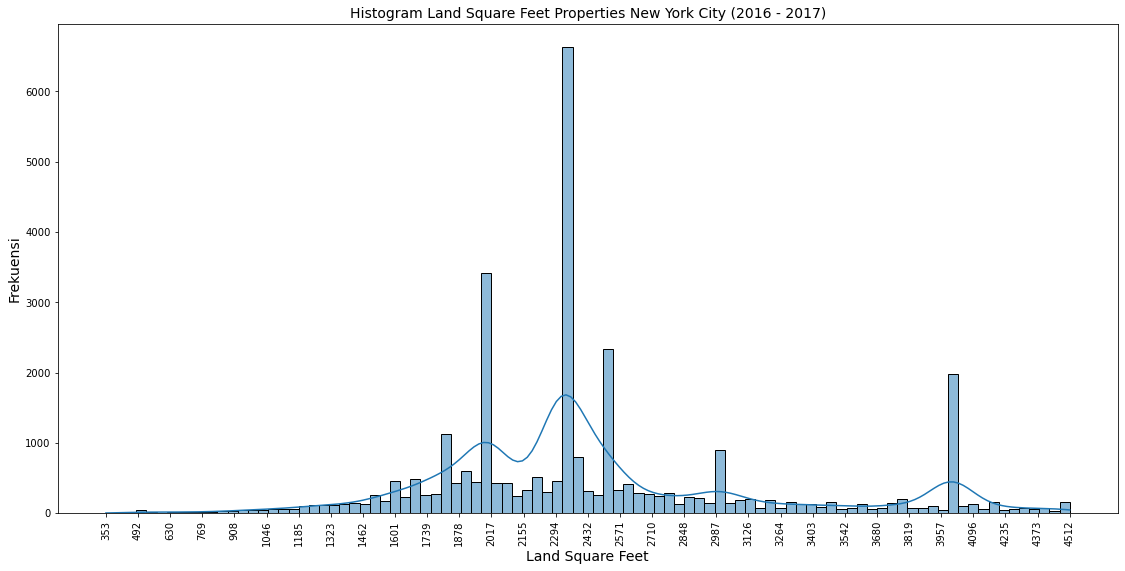

In [254]:
df_land_square_feet = df_nyc_sales['LAND SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_land_square_feet = np.histogram(df_land_square_feet,bins=30)
sns.histplot(df_land_square_feet,kde=True, ax=ax)
ax.set_title('Histogram Land Square Feet Properties New York City (2016 - 2017)', fontsize=14)
ax.set_xlabel('Land Square Feet', fontsize=14)
ax.set_xticks(bin_edge_land_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

Dari grafik, ditampilkan distribusi data belum terdistribusi normal

##### Central Limit Theorem (Convert Distribution to Normal)

In [255]:
n = 100
m = 1000
sample_mean_land_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a=df_land_square_feet,size=n)
    sample_mean_land_square_feet.append(np.mean(sample_values))

sample_mean_land_square_feet

[2379.33,
 2526.66,
 2390.99,
 2563.6,
 2385.84,
 2481.7,
 2608.84,
 2426.43,
 2551.66,
 2460.01,
 2300.63,
 2413.37,
 2551.07,
 2474.93,
 2635.93,
 2400.15,
 2467.34,
 2420.55,
 2420.91,
 2525.46,
 2496.21,
 2389.25,
 2396.31,
 2482.41,
 2466.77,
 2385.5,
 2535.77,
 2374.32,
 2642.05,
 2463.08,
 2503.34,
 2454.13,
 2501.47,
 2332.05,
 2428.96,
 2333.77,
 2521.77,
 2589.33,
 2529.37,
 2595.76,
 2405.45,
 2400.22,
 2591.84,
 2559.59,
 2486.37,
 2415.23,
 2529.21,
 2425.87,
 2415.46,
 2526.15,
 2643.76,
 2476.17,
 2489.91,
 2444.57,
 2548.27,
 2393.12,
 2490.1,
 2330.16,
 2223.01,
 2399.14,
 2542.57,
 2488.67,
 2553.38,
 2473.64,
 2429.54,
 2549.38,
 2493.19,
 2615.85,
 2527.86,
 2349.98,
 2413.82,
 2476.27,
 2505.62,
 2523.13,
 2406.55,
 2511.64,
 2372.41,
 2453.28,
 2452.83,
 2392.58,
 2484.03,
 2519.98,
 2514.21,
 2448.61,
 2429.01,
 2346.01,
 2381.64,
 2428.73,
 2414.54,
 2508.7,
 2458.3,
 2576.52,
 2462.9,
 2431.15,
 2498.68,
 2461.54,
 2324.41,
 2379.59,
 2530.5,
 2454.36,
 2535.36

Text(0, 0.5, 'Frekuensi')

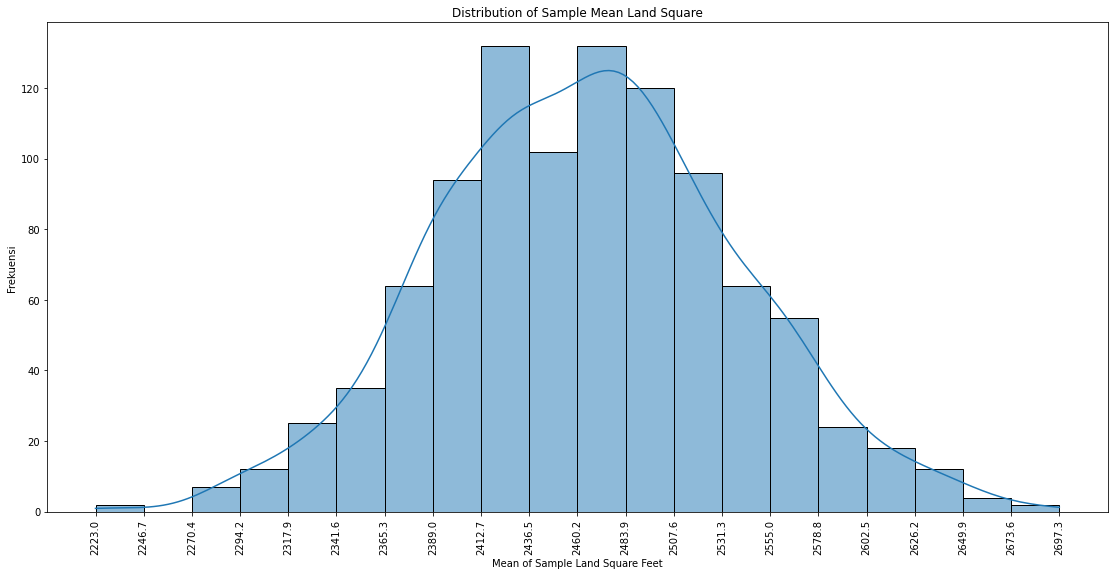

In [256]:
count, bin_edges = np.histogram(sample_mean_land_square_feet, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_land_square_feet,kde=True, bins=20, ax=ax)
ax.set_title('Distribution of Sample Mean Land Square')
ax.set_xlabel('Mean of Sample Land Square Feet')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Distribusi sudah normal. Data yang digunakan adalah sampel mean.

##### Mengetahui Nilai Mean, Median, Mode dan Standar Deviasi

In [257]:
sample_means_series = pd.Series(sample_mean_land_square_feet)

# hitung nilai rata-rata
print('Mean sampel mean kolom "LAND SQUARE FEET" = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean kolom "LAND SQUARE FEET" = ', sample_means_series.median())
# Hitung nilai mode
print('Mode sampel mean kolom "LAND SQUARE FEET" = ', sample_means_series.mode()[0])
# hitung standard deviasi 
print('Standar Deviasi sampel mean kolom "LAND SQUARE FEET" = ', sample_means_series.std())

Mean sampel mean kolom "LAND SQUARE FEET" =  2464.996989999998
Median sampel mean kolom "LAND SQUARE FEET" =  2464.4300000000003
Mode sampel mean kolom "LAND SQUARE FEET" =  2355.39
Standar Deviasi sampel mean kolom "LAND SQUARE FEET" =  73.66412080337099


##### Hitung standard error dari sampel mean

In [258]:
# hitung rata-rata dan standar deviasi populasi
pop_std_land_square = df_land_square_feet.std()
pop_mean_land_square = df_land_square_feet.mean()

# Menghitung jumlah seluruh populasi
number_of_observation = len(df_land_square_feet)

# Menghitung standar error
standard_error_of_sampel_mean_land_feet = pop_std_land_square/np.sqrt(number_of_observation)
standard_error_of_sampel_mean_land_feet

4.131784058173038

##### Hitung batas atas dan batas bawah untuk area 95% mean sampel berada dari mean populasi

In [259]:
z_score = 1.96
lower_bound_land_square = np.mean(sample_mean_land_square_feet) - z_score*standard_error_of_sampel_mean_land_feet
upper_bound_land_square = np.mean(sample_mean_land_square_feet) + z_score*standard_error_of_sampel_mean_land_feet
lower_bound_land_square, upper_bound_land_square

(2456.898693245981, 2473.095286754019)

**ANALISIS** <br>
Kurva terbentuk dengan distribusi normal, walaupun tidak sempurna dengan sedikit bergeser. Dibuktikan dengan nilai mean, median, yang sama dan mode yang sedikit bergeser. Jika melihat confidence intervalnya, dengan z-score 1.96 atau 95% yakin bahwa rata-rata dari LAND SQUARE FEET berada pada rentang [2456.780663245981, 2472.977256754019]

#### 2. Confidence Intervals
Menggunakan data kolom SALE PRICE.

##### Rata-rata (mean) populasi

In [260]:
pop_mean_sale_price = df_nyc_sales['SALE PRICE'].mean()
pop_mean_sale_price

573835.3769552765

##### Standar deviasi populasi

In [261]:
pop_std_sale_price = df_nyc_sales['SALE PRICE'].std()
pop_std_sale_price

448406.1861522448

##### Histogram

Text(0, 0.5, 'Frekuensi')

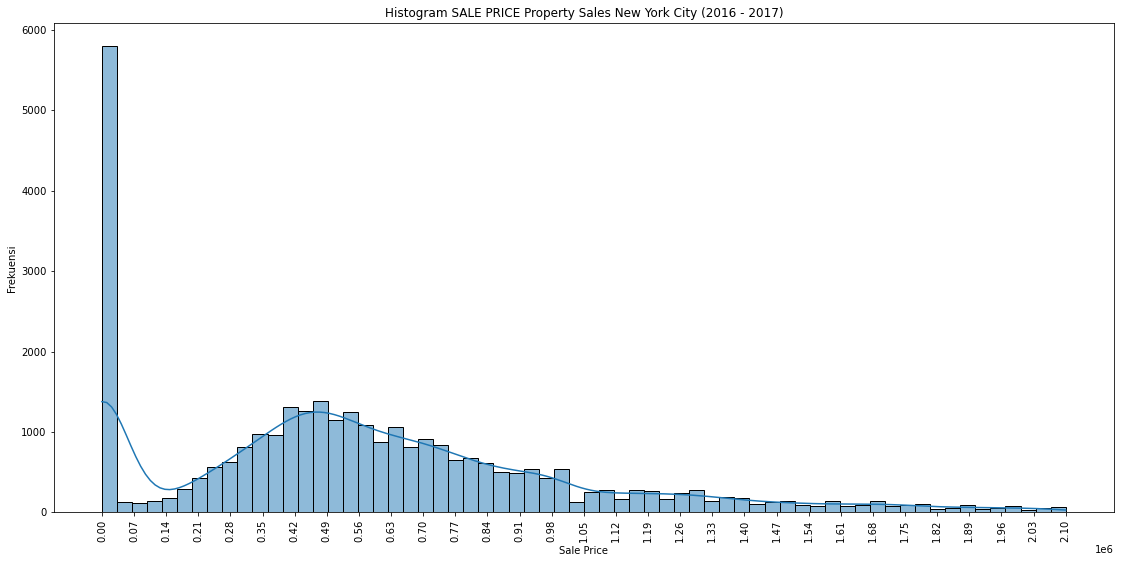

In [262]:
# Plotting for SALE PRICE
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edges_sale_price = np.histogram(df_nyc_sales['SALE PRICE'],bins=30)
sns.histplot(df_nyc_sales['SALE PRICE'],kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE Property Sales New York City (2016 - 2017)')
ax.set_xlabel('Sale Price')
ax.set_xticks(bin_edges_sale_price)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Distribusi belum normal, bahkan skew ke kiri. Dilakukan Central Limit Theorem untuk menangani hal ini. Central limit theorem akan melakukan sampling pada data dengan mengambil m sampel dari n nilai acak. Pada kasus ini akan dilakukan sampling dengan jumlah sampel 10000 dari 100 nilai acak. Distribusi dari sampel yang diambil akan berdistribusi normal. Sehingga perhitungan CI bisa dilakukan pada sampel yang sudah berdistribusi normal ini

In [263]:
sample_means = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=df_nyc_sales['SALE PRICE'], size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frekuensi')

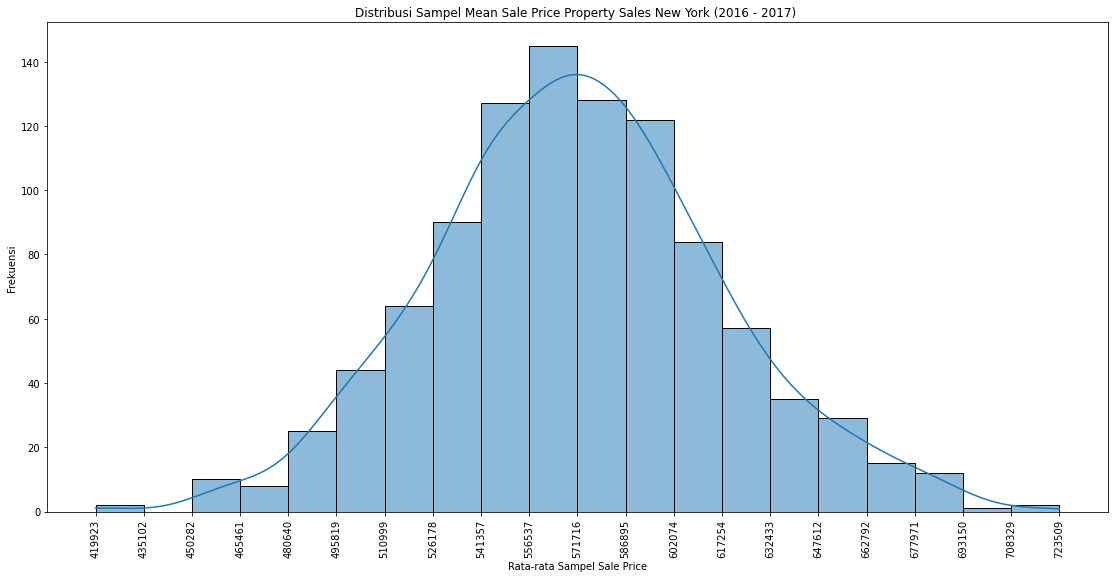

In [264]:
count, bin_edges = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_means,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Sale Price Property Sales New York (2016 - 2017) ')
ax.set_xlabel('Rata-rata Sampel Sale Price')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

In [265]:
sample_means_series = pd.Series(sample_means)

# hitung nilai rata-rata
print('Rata rata sampel mean kolom SALE PRICE = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean kolom SALE PRICE = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean kolom SALE PRICE = ', sample_means_series.std())

Rata rata sampel mean kolom SALE PRICE =  571531.1103200001
Median sampel mean kolom SALE PRICE =  570745.215
Standar Deviasi sampel mean kolom SALE PRICE =  45533.2212902621


##### Mean dan Standard Deviasi dari Sample Mean

In [266]:
mean_of_sampel_mean = np.mean(sample_means)
std_of_sampel_mean = np.std(sample_means)

##### Standard Error dari Sample Mean

In [267]:
z_score = 1.96
number_of_observation = len(df_nyc_sales)
standard_error_of_sampel_mean = pop_std_sale_price/np.sqrt(number_of_observation)

##### Batas Atas dan Bawah untuk Area 95% sampel mean berada di mean populasi

In [268]:
lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean
lower_bound, upper_bound

(566600.5241249518, 576461.6965150482)

##### Analisis
95% yakin bahwa nilai rata-rata dari Property Sales di New York City (2016 - 2017) berada dalam rentang 569650.8237149519 sampai 579511.9961050482 US Dollar

### Hypotesis Testing

Apakah harga rata-rata jual bangunan di Borough 1 (Manhattan) berbeda signifikan dari rata-rata harga jual bagunan di Borough 3 (Brooklyn) ?

#### Deklarasi Null Hipotesis dan Alternatif Hipotesis

Populasi : Harga jual bangunan dalam NYC Sales Data untuk wilayah Manhattan dan Brooklyn. </br>
Parameter of Interest : miu1 --> harga jual bangunan di Manhataan, miu2 --> harga jual bangunan di Brooklyn </br>
H0 : miu1 = miu2 </br>
Ha : miu1 != miu2 </br>

#### Tentukan level signifikansi

Alpha digunakan biasanya 0.05.
1. Jika p value > alpha maka terima H0
2. Jika p value <= alpha maka tolak H0

#### Lihat distribusi data

Z test dilakukan untuk distribusi data normal. Pada tahap ini akan dilihat distribusi dari populasi penjualan bangunan di Manhattan dan Brooklyn

In [269]:
df_nyc_sales['BOROUGH']

0        1
1        1
2        1
3        1
4        1
        ..
31768    5
31769    5
31770    5
31771    5
31772    5
Name: BOROUGH, Length: 31773, dtype: object

In [270]:
# mengambil data penjualan di Manhattan
sales_manhattan = df_nyc_sales[(df_nyc_sales['BOROUGH'] == "1")]['SALE PRICE']

# mengambil data penjualan di Brooklyn
sales_brooklyn = df_nyc_sales[(df_nyc_sales['BOROUGH'] == "3")]['SALE PRICE']

# hitung banyak data penjualan
len(sales_manhattan), len(sales_brooklyn)

(3629, 9995)

Text(17.200000000000017, 0.5, 'Frqkuensi')

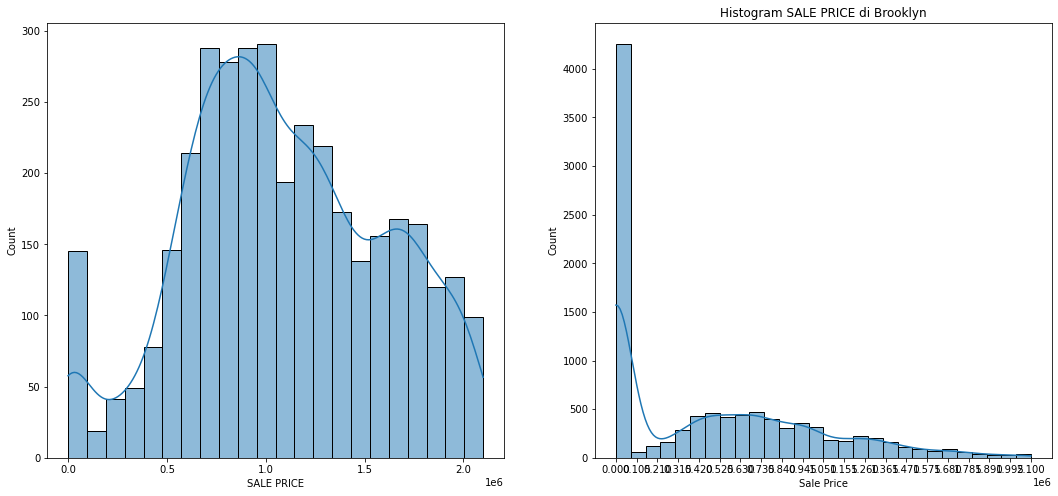

In [271]:
# menampilkan distribusi penjualan di Manhattan dan Brooklyn
fig = plt.figure(figsize=(18,8))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Plotting for Manhattan
count, bin_edges_manhattan = np.histogram(sales_manhattan, bins=20)
sns.histplot(sales_manhattan, kde=True, ax = ax0)
ax.set_title('Histogram SALE PRICE di Manhattan')
ax.set_label('Sale Price')
ax.set_xticks(bin_edges_manhattan)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi')

# Plotting for Brooklyn
count, bin_edges_brooklyn = np.histogram(sales_brooklyn, bins=20)
sns.histplot(sales_brooklyn, kde=True, ax=ax1)
ax1.set_title('Histogram SALE PRICE di Brooklyn')
ax1.set_xlabel('Sale Price')
ax1.set_xticks(bin_edges_brooklyn)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frqkuensi')

Karena jumlah data bangunan di Manhattan dan Brooklyn tidak seimbang, serta distribusi belum normal, maka akan dilakukan samplung dengan central limit theorem. Sampling akan dilakukan sebanyak 1000 sampel yang diambil dari 100 nilai acak pada masing-masing lokasi. Setelah distribusi normal maka akan dilakukan z test untuk menguji hipotesis yang sudah dibuat.

In [272]:
sample_means_manhattan = []  # list untuk menampung rata-rata dari sejumlah nilai acak
n = 100 
m = 1000

for sample in range(0, m):
  # ambil n nilai acak dari SALE PRICE untuk manhattan
  sample_values = np.random.choice(a = sales_manhattan, size=n)
  # hitung mean
  sample_mean = np.mean(sample_values)
  # tambahkan ke list
  sample_means_manhattan.append(sample_mean)

sample_means_brooklyn = []
n = 100
m = 1000

for sample in range(0, m):
  sample_values = np.random.choice(a = sales_brooklyn, size=n)
  sample_mean = np.mean(sample_values)
  sample_means_brooklyn.append(sample_mean)

Text(17.200000000000017, 0.5, 'Frekuensi')

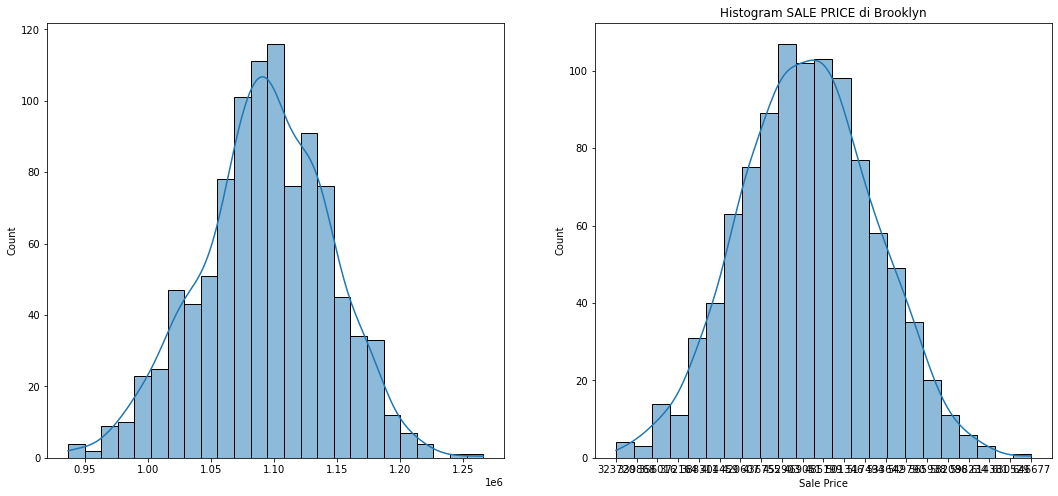

In [273]:
# menampilkan distribusi penjualan di Manhattan dan Brooklyn
fig = plt.figure(figsize=(18,8))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Plotting for Manhattan
count, bin_edges_manhattan = np.histogram(sample_means_manhattan, bins=20)
sns.histplot(sample_means_manhattan, kde=True, ax = ax0)
ax.set_title('Histogram SALE PRICE di Manhattan')
ax.set_label('Sale Price')
ax.set_xticks(bin_edges_manhattan)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi')

# Plotting for Brooklyn
count, bin_edges_brooklyn = np.histogram(sample_means_brooklyn, bins=20)
sns.histplot(sample_means_brooklyn, kde=True, ax=ax1)
ax1.set_title('Histogram SALE PRICE di Brooklyn')
ax1.set_xlabel('Sale Price')
ax1.set_xticks(bin_edges_brooklyn)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi')

#### Menghitung test statistics

In [274]:
import statsmodels.api as sm

In [275]:
z_score, pvalue = sm.stats.ztest(sample_means_manhattan, sample_means_brooklyn, alternative='two-sided')

In [276]:
print(pvalue)

0.0


#### Penarikan kesimpulan

In [277]:
if pvalue > 0.05:
    print("H0 diterima")
else:
    print("Ha diterima")

Ha diterima


##### Analisis
Karena nilai p-value 0.0 sangat kecil dan nilainya kurang dari atau sama dengan alpha, maka H0 (null hipotesis) di tolak.

Oleh karena itu, Ha diterima yaitu terdapat perbedaan signifikan antara rata-rata harga jual di Manhattan dan Brooklyn.